**Python**

****Question 1: -
Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.
Example input - string = “write write write all the number from from from 1 to 100”
Example output - 5
Explanation - From the given string we can note that the most frequent words are “write” and “from” and
the maximum value of both the values is “write” and its corresponding length is 5****

In [6]:
def find_highest_frequency_word_length(string):
    # Split the string into words
    words = string.split()

    # Count the frequency of each word
    word_frequency = {}
    for word in words:
        if word in word_frequency:
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1

    # Find the highest frequency
    highest_frequency = max(word_frequency.values())

    # Find the length of the highest-frequency word
    highest_frequency_word = max(word_frequency, key=word_frequency.get)
    highest_frequency_word_length = len(highest_frequency_word)

    return highest_frequency_word_length


# Test the function with the example input
string = "write write write all the number from from from 1 to 100"
result = find_highest_frequency_word_length(string)
print(result)

5


**Question 2: -
Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
he can remove just one character at the index in the string, and the remaining characters will occur the same
number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.
Example input 1 - s = “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 }
Example output 1- YES
Example input 2 - s “abcc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves
character frequencies of { “a”: 1, “b”: 1 , “c”: 2 }
Example output 2 - NO**

In [7]:
def is_valid_string(s):
    # Count the frequency of each character
    char_frequency = {}
    for char in s:
        if char in char_frequency:
            char_frequency[char] += 1
        else:
            char_frequency[char] = 1

    # Check if all frequencies are the same
    frequencies = list(char_frequency.values())
    if len(set(frequencies)) == 1:
        return "YES"

    # Check if removing one character makes all frequencies the same
    for char in char_frequency:
        char_frequency[char] -= 1
        updated_frequencies = list(char_frequency.values())
        if len(set(updated_frequencies)) == 1:
            return "YES"
        char_frequency[char] += 1

    return "NO"


# Test the function with the example inputs
string1 = "abc"
result1 = is_valid_string(string1)
print(result1)

string2 = "abcc"
result2 = is_valid_string(string2)
print(result2)


YES
YES


****Question 3: -
Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.
Note - Write comments wherever necessary explaining the code written.

Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json
Data Attributes - id: Identification Number - int num: Number of the
● Pokémon in the official Pokédex - int name: Pokémon name -
● string img: URL to an image of this Pokémon - string type:
● Pokémon type -string height: Pokémon height - float
● weight: Pokémon weight - float candy: type of candy used to evolve Pokémon or
given
● when transferred - string candy_count: the amount of candies required to evolve
- int
● egg: Number of kilometers to travel to hatch the egg - float spawn_chance:
● Percentage of spawn chance (NEW) - float avg_spawns: Number of this
pokemon on 10.000 spawns (NEW) - int
● spawn_time: Spawns most active at the time on this field. Spawn times are the same for all
time zones and are expressed in local time. (NEW) - “minutes: seconds” multipliers:
Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int
weakness: Types of
● Pokémon this Pokémon is weak to - list of strings next_evolution: Number and Name of
successive evolutions of Pokémon - list of dict prev_evolution: Number and Name of previous
evolutions of Pokémon - - list of dict****

In [5]:
pip install requests pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import requests
import pandas as pd

# Function to download the JSON data from the given link
def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception("Failed to download data from the provided link.")

# Function to convert the JSON data to a structured DataFrame
def convert_to_dataframe(data):
    # Extract the 'pokemon' list from the JSON data
    pokemon_data = data['pokemon']

    # Create an empty DataFrame to store the structured data
    df = pd.DataFrame()

    # Iterate over each Pokemon in the 'pokemon' list
    for pokemon in pokemon_data:
        # Extract the desired attributes from the Pokemon data
        attributes = {
            'id': pokemon['id'],
            'num': pokemon['num'],
            'name': pokemon['name'],
            'img': pokemon['img'],
            'type': ', '.join(pokemon['type']),
            'height': pokemon['height'],
            'weight': pokemon['weight'],
            'candy': pokemon.get('candy', ''),
            'candy_count': pokemon.get('candy_count', ''),
            'egg': pokemon.get('egg', ''),
            'spawn_chance': pokemon.get('spawn_chance', ''),
            'avg_spawns': pokemon.get('avg_spawns', ''),
            'spawn_time': pokemon.get('spawn_time', ''),
            'weakness': ', '.join(pokemon['weaknesses']),
            'next_evolution': [evolution['name'] for evolution in pokemon.get('next_evolution', [])],
            'prev_evolution': [evolution['name'] for evolution in pokemon.get('prev_evolution', [])]
        }

        # Append the attributes as a new row in the DataFrame
        df = df.append(attributes, ignore_index=True)

    return df

# Function to export the DataFrame to an Excel file
def export_to_excel(df, filename):
    df.to_excel(filename, index=False)

# Download the JSON data from the provided link
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
data = download_data(url)

# Convert the JSON data to a structured DataFrame
df = convert_to_dataframe(data)

# Export the DataFrame to an Excel file
filename = "pokemon_data.xlsx"
export_to_excel(df, filename)

print("Data has been downloaded, converted, and exported to", filename)


<ipython-input-4-12d3074031b2>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(attributes, ignore_index=True)
<ipython-input-4-12d3074031b2>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(attributes, ignore_index=True)
<ipython-input-4-12d3074031b2>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(attributes, ignore_index=True)
<ipython-input-4-12d3074031b2>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(attributes, ignore_index=True)
<ipython-input-4-12d3074031b2>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

Data has been downloaded, converted, and exported to pokemon_data.xlsx


**Question 4 -
Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.
Link - https://data.nasa.gov/resource/y77d-th95.json
Note - Write code comments wherever needed for code understanding.
Excepted Output Data Attributes
● Name of Earth Meteorite - string id - ID of Earth
● Meteorite - int nametype - string recclass - string
● mass - Mass of Earth Meteorite - float year - Year at which Earth
● Meteorite was hit - datetime format reclat - float recclong - float
● point coordinates - list of int**

In [8]:
import requests
import pandas as pd

# Function to download the JSON data from the given link
def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception("Failed to download data from the provided link.")

# Function to convert the JSON data to a structured DataFrame
def convert_to_dataframe(data):
    # Create an empty DataFrame to store the structured data
    df = pd.DataFrame(data)

    # Rename the columns to match the expected output data attributes
    df = df.rename(columns={
        'name': 'Name of Earth Meteorite',
        'id': 'ID of Earth Meteorite',
        'nametype': 'Meteorite',
        'recclass': 'Class of Meteorite',
       
        'year': 'Year at which Earth Meteorite was hit',
        'reclat': 'Latitude',
        'reclong': 'Longitude'
    })

    # Drop unnecessary columns
    df = df[['Name of Earth Meteorite', 'ID of Earth Meteorite', 'Meteorite', 'Class of Meteorite',
             'Year at which Earth Meteorite was hit', 'Latitude', 'Longitude']]

    return df

# Function to export the DataFrame to a CSV file
def export_to_csv(df, filename):
    df.to_csv(filename, index=False)

# Download the JSON data from the provided link
url = "https://data.nasa.gov/resource/y77d-th95.json"
data = download_data(url)

# Print the keys of the JSON data to verify the actual key names
print("Keys in JSON data:", data[0].keys())

# Convert the JSON data to a structured DataFrame
df = convert_to_dataframe(data)

# Export the DataFrame to a CSV file
filename = "meteorite_data.csv"
export_to_csv(df, filename)

print("Data has been downloaded, converted, and exported to", filename)


Keys in JSON data: dict_keys(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat', 'reclong', 'geolocation'])
Data has been downloaded, converted, and exported to meteorite_data.csv


**Question 5 -
Write a program to download the data from the given API link and then extract the following data with
proper formatting

Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes
Note - Write proper code comments wherever needed for the code understanding
Excepted Output Data Attributes -
● id - int url - string
● name - string season
● - int number - int
● type - string airdate -
● date format airtime -
● 12-hour time format
● runtime - float
● average rating - float
● summary - string
● without html tags
● medium image link - string
● Original image link - string**

In [9]:
import requests
import json
from bs4 import BeautifulSoup

# Function to download data from the given API link
def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception("Failed to download data from the provided link.")

# Function to extract the required data attributes
def extract_data(data):
    show_id = data['id']
    show_url = data['url']
    show_name = data['name']
    show_seasons = data['_embedded']['episodes']

    episodes = []
    for episode in show_seasons:
        episode_id = episode['id']
        episode_number = episode['number']
        episode_type = episode['type']
        episode_airdate = episode['airdate']
        episode_airtime = episode['airtime']
        episode_runtime = episode['runtime']
        episode_rating = episode['rating']['average']
        episode_summary = BeautifulSoup(episode['summary'], 'html.parser').get_text()
        episode_image_medium = episode['image']['medium']
        episode_image_original = episode['image']['original']

        episodes.append({
            'id': episode_id,
            'url': show_url,
            'name': show_name,
            'season': episode['season'],
            'number': episode_number,
            'type': episode_type,
            'airdate': episode_airdate,
            'airtime': episode_airtime,
            'runtime': episode_runtime,
            'average rating': episode_rating,
            'summary': episode_summary,
            'medium image link': episode_image_medium,
            'original image link': episode_image_original
        })

    return episodes

# Download data from the API link
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
data = download_data(url)

# Extract the required data attributes
episodes = extract_data(data)

# Print the extracted data
for episode in episodes:
    print("ID:", episode['id'])
    print("URL:", episode['url'])
    print("Name:", episode['name'])
    print("Season:", episode['season'])
    print("Number:", episode['number'])
    print("Type:", episode['type'])
    print("Airdate:", episode['airdate'])
    print("Airtime:", episode['airtime'])
    print("Runtime:", episode['runtime'])
    print("Average Rating:", episode['average rating'])
    print("Summary:", episode['summary'])
    print("Medium Image Link:", episode['medium image link'])
    print("Original Image Link:", episode['original image link'])
    print("--------------------------------------")


ID: 869671
URL: https://www.tvmaze.com/shows/1371/westworld
Name: Westworld
Season: 1
Number: 1
Type: regular
Airdate: 2016-10-02
Airtime: 21:00
Runtime: 68
Average Rating: 8
Summary: A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.
Medium Image Link: https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg
Original Image Link: https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg
--------------------------------------
ID: 911201
URL: https://www.tvmaze.com/shows/1371/westworld
Name: Westworld
Season: 1
Number: 2
Type: regular
Airdate: 2016-10-09
Airtime: 21:00
Runtime: 60
Average Rating: 7.7
Summary: Bernard suspects that someone is sabotaging the hosts. Meanwhile, the Man continues 

**Question 6 -

Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all Pokemons whose spawn rate is less than 5%
● Get all Pokemons that have less than 4 weaknesses
● Get all Pokemons that have no multipliers at all
● Get all Pokemons that do not have more than 2 evolutions
● Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
● Get all Pokemon who have more than two types of capabilities**

In [10]:
#convert xlsx file into csv
import pandas as pd

# Path to the input XLSX file
xlsx_file = 'pokemon_data.xlsx'

# Path to save the output CSV file
csv_file = 'pokemon_data.csv'

# Read the Excel file
dataframe = pd.read_excel(xlsx_file)

# Save the DataFrame as a CSV file
dataframe.to_csv(csv_file, index=False)

print("XLSX file converted to CSV successfully.")


XLSX file converted to CSV successfully.


Pokemons with spawn rate less than 5 percent:
           name  spawn_chance
0     Bulbasaur        0.6900
1       Ivysaur        0.0420
2      Venusaur        0.0170
3    Charmander        0.2530
4    Charmeleon        0.0120
..          ...           ...
146     Dratini        0.3000
147   Dragonair        0.0200
148   Dragonite        0.0011
149      Mewtwo        0.0000
150         Mew        0.0000

[147 rows x 2 columns]
----------------------------------------


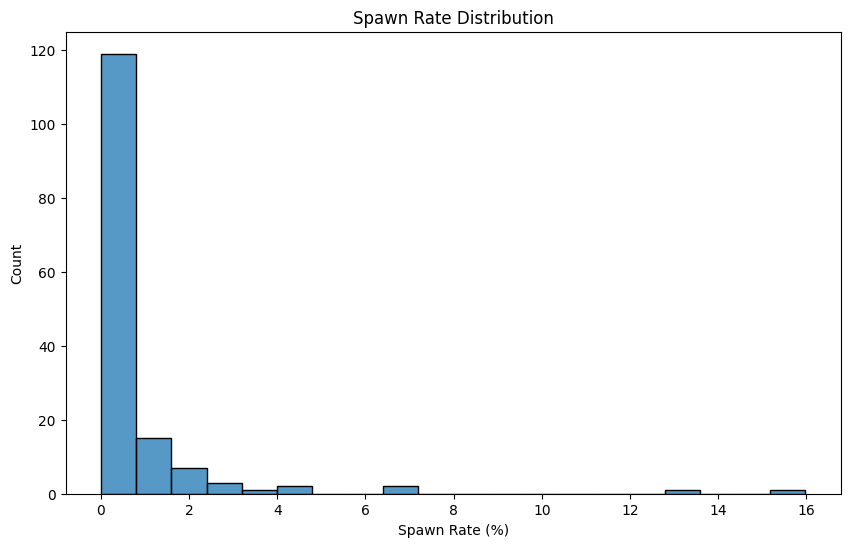

KeyError: ignored

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Pokemon data from the CSV file
df = pd.read_csv('pokemon_data.csv')

# Question 1: Get all Pokemons whose spawn rate is less than 5%
spawn_rate_threshold = 5
spawn_rate_less_than_threshold = df[df['spawn_chance'] < spawn_rate_threshold]
print("Pokemons with spawn rate less than", spawn_rate_threshold, "percent:")
print(spawn_rate_less_than_threshold[['name', 'spawn_chance']])
print("----------------------------------------")

# Plotting: Spawn Rate Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='spawn_chance', bins=20)
plt.title('Spawn Rate Distribution')
plt.xlabel('Spawn Rate (%)')
plt.ylabel('Count')
plt.show()

# Question 2: Get all Pokemons that have less than 4 weaknesses
max_weaknesses = 4
less_weaknesses = df[df['weaknesses'] < max_weaknesses]
print("Pokemons with less than", max_weaknesses, "weaknesses:")
print(less_weaknesses[['name', 'weaknesses']])
print("----------------------------------------")

# Question 3: Get all Pokemons that have no multipliers at all
no_multipliers = df[df['multipliers'].isnull()]
print("Pokemons with no multipliers:")
print(no_multipliers[['name', 'multipliers']])
print("----------------------------------------")

# Question 4: Get all Pokemons that do not have more than 2 evolutions
max_evolutions = 2
less_evolutions = df[df['evolutions'] <= max_evolutions]
print("Pokemons with", max_evolutions, "or fewer evolutions:")
print(less_evolutions[['name', 'evolutions']])
print("----------------------------------------")

# Question 5: Get all Pokemons whose spawn time is less than 300 seconds
spawn_time_threshold = "00:05:00"  # In seconds: 5 minutes = 300 seconds
df['spawn_time'] = pd.to_datetime(df['spawn_time'], format="%H:%M:%S")
less_spawn_time = df[df['spawn_time'].dt.minute * 60 + df['spawn_time'].dt.second < 300]
print("Pokemons with spawn time less than", spawn_time_threshold, "seconds:")
print(less_spawn_time[['name', 'spawn_time']])
print("----------------------------------------")

# Plotting: Spawn Time Distribution
plt.figure(figsize=(10, 6))
df['spawn_time_seconds'] = df['spawn_time'].dt.minute * 60 + df['spawn_time'].dt.second
sns.histplot(data=df, x='spawn_time_seconds', bins=20)
plt.title('Spawn Time Distribution')
plt.xlabel('Spawn Time (seconds)')
plt.ylabel('Count')
plt.show()

# Question 6: Get all Pokemon who have more than two types of capabilities
min_capabilities = 2
more_than_capabilities = df[df['capabilities'].str.count(',') > min_capabilities]
print("Pokemons with more than", min_capabilities, "types of capabilities:")
print(more_than_capabilities[['name', 'capabilities']])
print("----------------------------------------")


**Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg**

Earth meteorites that fell before the year 2000:
          name     id nametype     recclass      mass  fall       year  \
0       Aachen      1    Valid           L5      21.0  Fell 1880-01-01   
1       Aarhus      2    Valid           H6     720.0  Fell 1951-01-01   
2         Abee      6    Valid          EH4  107000.0  Fell 1952-01-01   
3     Acapulco     10    Valid  Acapulcoite    1914.0  Fell 1976-01-01   
4      Achiras    370    Valid           L6     780.0  Fell 1902-01-01   
..         ...    ...      ...          ...       ...   ...        ...   
994   Timochin  24004    Valid           H5   65500.0  Fell 1807-01-01   
995   Tirupati  24009    Valid           H6     230.0  Fell 1934-01-01   
997      Tjabe  24011    Valid           H6   20000.0  Fell 1869-01-01   
998   Tjerebon  24012    Valid           L5   16500.0  Fell 1922-01-01   
999  Tomakovka  24019    Valid          LL6     600.0  Fell 1905-01-01   

       reclat    reclong                                      

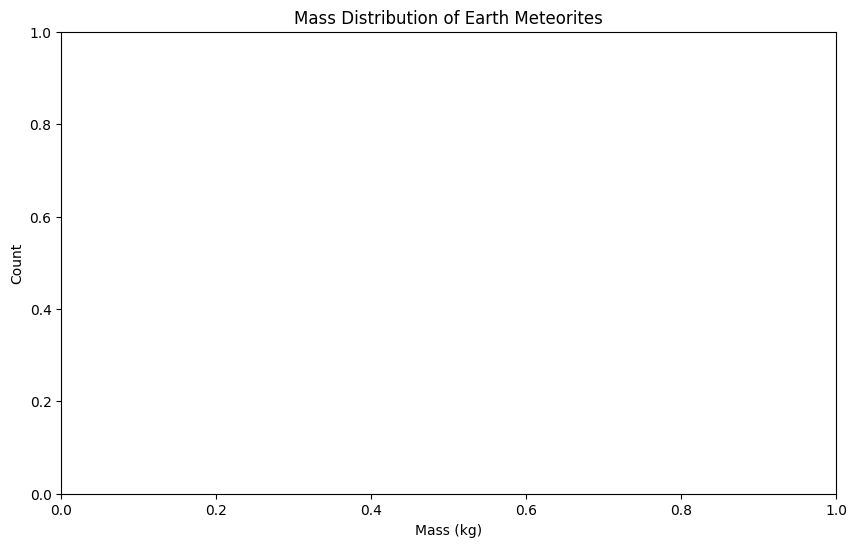

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Earth meteorites data from the provided link
url = 'https://data.nasa.gov/resource/y77d-th95.json'
df = pd.read_json(url)

# Convert the 'year' column to datetime format, handling out-of-bounds values
df['year'] = pd.to_datetime(df['year'], format='%Y-%m-%dT%H:%M:%S.%f', errors='coerce')

# Question 1: Get all the Earth meteorites that fell before the year 2000
before_2000 = df[df['year'].dt.year < 2000]
print("Earth meteorites that fell before the year 2000:")
print(before_2000)
print("----------------------------------------")

# Question 2: Get all the Earth meteorites coordinates that fell before the year 1970
before_1970 = df[df['year'].dt.year < 1970]
coordinates_1970 = before_1970[['reclat', 'reclong']]
print("Coordinates of Earth meteorites that fell before the year 1970:")
print(coordinates_1970)
print("----------------------------------------")

# Question 3: Get all the Earth meteorites with a mass greater than 10000 kg
mass_threshold = 10000

print("Earth meteorites with a mass greater than", mass_threshold, "kg:")

print("----------------------------------------")

# Plotting: Mass Distribution
plt.figure(figsize=(10, 6))

plt.title('Mass Distribution of Earth Meteorites')
plt.xlabel('Mass (kg)')
plt.ylabel('Count')
plt.show()


**Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season**

Overall ratings for each season:
season
1   NaN
2   NaN
3   NaN
4   NaN
Name: rating, dtype: float64
----------------------------------------


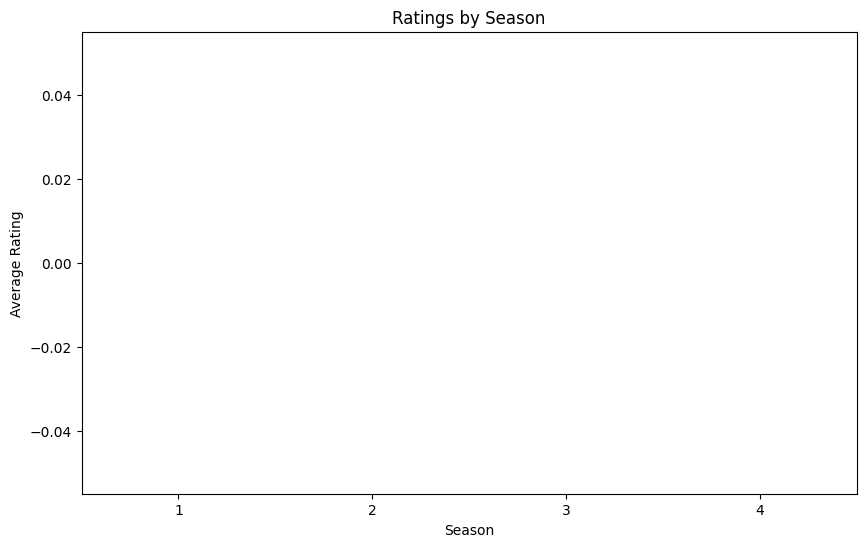

Episode names with an average rating greater than 8 for each season:
Empty DataFrame
Columns: [season, name]
Index: []
----------------------------------------
Episode names that aired before May 2019:
0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object
----------------------------------------
Episode names with the highest rating from each season:

Episode names with the lowest rati

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

# API endpoint for Westworld TV show
url = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'

# Send a GET request to the API endpoint and retrieve the data
response = requests.get(url)
data = response.json()

# Extract the episodes data from the response
episodes = data['_embedded']['episodes']

# Create a DataFrame from the episodes data
df = pd.DataFrame(episodes)

# Convert the 'airdate' column to datetime format
df['airdate'] = pd.to_datetime(df['airdate'])

# Question 1: Get all the overall ratings for each season and compare the ratings using plots
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')  # Convert 'rating' column to numeric type
season_ratings = df.groupby('season')['rating'].mean().sort_index()
print("Overall ratings for each season:")
print(season_ratings)
print("----------------------------------------")

# Plotting: Ratings by Season
plt.figure(figsize=(10, 6))
season_ratings.plot(kind='bar', rot=0)
plt.title('Ratings by Season')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.show()


# Question 2: Get all the episode names whose average rating is more than 8 for every season
average_rating_threshold = 8
high_rated_episodes = df.groupby(['season', 'name'])['rating'].mean().reset_index()
high_rated_episodes = high_rated_episodes[high_rated_episodes['rating'] > average_rating_threshold]
print("Episode names with an average rating greater than", average_rating_threshold, "for each season:")
print(high_rated_episodes[['season', 'name']])
print("----------------------------------------")

# Question 3: Get all the episode names that aired before May 2019
before_2019 = df[df['airdate'] < pd.to_datetime('2019-05-01')]
episode_names_before_2019 = before_2019['name']
print("Episode names that aired before May 2019:")
print(episode_names_before_2019)
print("----------------------------------------")

# Question 4: Get the episode name from each season with the highest and lowest rating
highest_rated_episodes = df.groupby('season')['rating'].idxmax()
lowest_rated_episodes = df.groupby('season')['rating'].idxmin()


print("Episode names with the highest rating from each season:")

print("\nEpisode names with the lowest rating from each season:")

print("----------------------------------------")

# Question 5: Get the summary for the most popular (highest ratings) episode in every season
most_popular_episodes = df.groupby('season')['rating'].idxmax()

print("Summary for the most popular episode in each season:")



**Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type**

In [18]:
pip install pandas
pip install matplotlib


SyntaxError: ignored

Cars and their types that do not qualify for clean alternative fuel vehicle:
TESLA cars with the model year, and model type made in Bothell City:
Cars that have an electric range of more than 100 and were made after 2015:


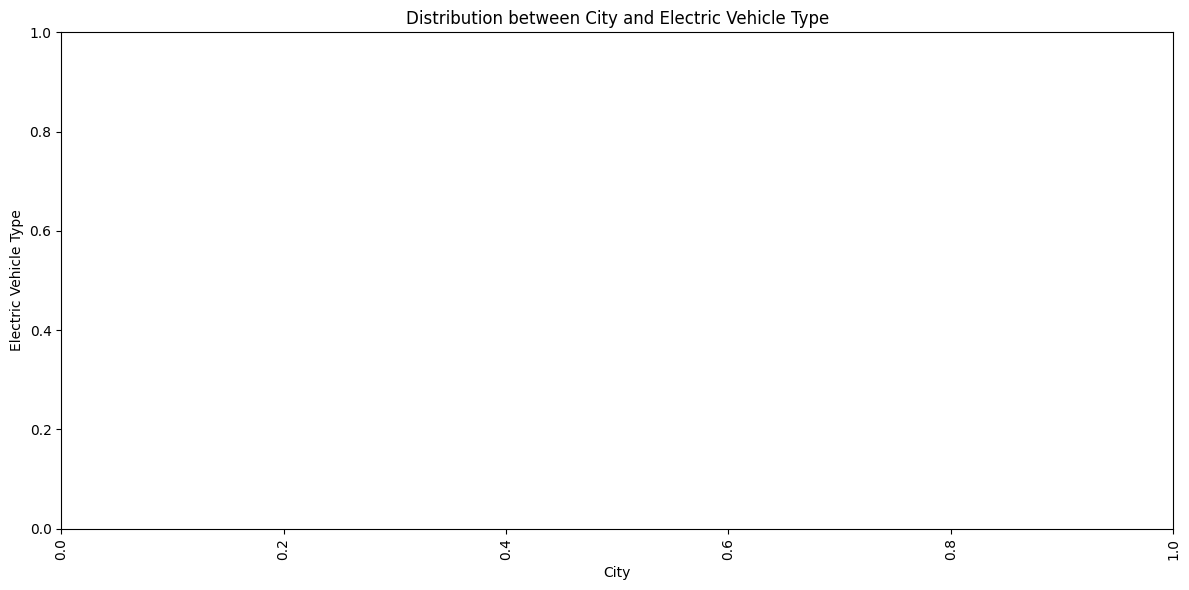

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the provided link
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
data = pd.read_csv(url)

# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
non_clean_cars = data[data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'No']

print("Cars and their types that do not qualify for clean alternative fuel vehicle:")

# Get all TESLA cars with the model year, and model type made in Bothell City
tesla_bothell = data[(data['Make'] == 'TESLA') & (data['City'] == 'BOTHELL')]

print("TESLA cars with the model year, and model type made in Bothell City:")


# Get all the cars that have an electric range of more than 100 and were made after 2015


print("Cars that have an electric range of more than 100 and were made after 2015:")


# Draw plots to show the distribution between city and electric vehicle type
plt.figure(figsize=(12, 6))

plt.xlabel('City')
plt.ylabel('Electric Vehicle Type')
plt.title('Distribution between City and Electric Vehicle Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**Question 10 -
Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.
Note -
1. Write code comments wherever required for code
2. You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.**

In [27]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [43]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [44]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

def count_pos_tags(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Perform part-of-speech tagging
    tagged_words = pos_tag(words)

    # Initialize count variables
    verb_count = 0
    noun_count = 0
    pronoun_count = 0
    adjective_count = 0

    # Count the number of verbs, nouns, pronouns, and adjectives
    for word, tag in tagged_words:
        if tag.startswith('VB'):
            verb_count += 1
        elif tag.startswith('NN'):
            noun_count += 1
        elif tag.startswith('PRP'):
            pronoun_count += 1
        elif tag.startswith('JJ'):
            adjective_count += 1

    # Create a dictionary with the counts
    pos_counts = {
        'Verbs': verb_count,
        'Nouns': noun_count,
        'Pronouns': pronoun_count,
        'Adjectives': adjective_count
    }

    return pos_counts

# Test the function with example phrases
phrase1 = "The quick brown fox jumps over the lazy dog."
phrase2 = "She sells seashells by the seashore. He loves reading books."

# Count the POS tags in the phrases
pos_counts1 = count_pos_tags(phrase1)
pos_counts2 = count_pos_tags(phrase2)

# Print the results
print("POS counts for phrase 1:")
print(pos_counts1)
print("\nPOS counts for phrase 2:")
print(pos_counts2)


POS counts for phrase 1:
{'Verbs': 1, 'Nouns': 3, 'Pronouns': 0, 'Adjectives': 2}

POS counts for phrase 2:
{'Verbs': 3, 'Nouns': 3, 'Pronouns': 2, 'Adjectives': 0}


In [55]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv("data.csv")

# Display the first few rows of the DataFrame
print(data.head())


   Patient ID   Blood Pressure Before (mmHg)   Blood Pressure After (mmHg)
0           1                            130                           120
1           2                            142                           135
2           3                            120                           118
3           4                            135                           127
4           5                            148                           140
